In [1]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

import matplotlib.pyplot as plt
from datetime import datetime

2023-12-12 17:26:09.874655: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# gpu_device = tf.config.experimental.list_physical_devices('GPU')
# print(f"Number of GPU = {len(gpu_device)}")
# tf.config.experimental.set_memory_growth(gpu_device[0], True)

physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  print('nop')

2023-12-12 17:26:28.886673: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-12-12 17:26:28.887482: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-12-12 17:26:30.691402: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-12 17:26:30.691666: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2023-12-12 17:26:30.691699: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-12-12 17:26:31.095164: I tensorflow/stream_executor/platform/defa

In [5]:
# Define parameters
input_shape = (128, 128, 3)  # Adjust based on your dataset
batch_size = 32
num_classes = 50

train_data_dir = './Dataset/BanglaLekha-Isolated/BanglaLekha-Isolated/Images/'
train_data_dir = './Dataset/b/Train/'
# test_data_dir = './dataset/RESIZED_TESTING_DATA'

# Create data generators with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validationfrom datetime import datetime
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    # color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Set this to 'validation' for the validation set
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    # color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Set this to 'training' for the training set
)

# Define a function to create a model with a specific base model
def create_transfer_model(base_model):
    base_model.trainable = False  # Freeze pre-trained layers
    
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model

# List of base models to try
base_models = [
    tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape),
    tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=input_shape),
    
    tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape),
    tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape),
    tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape),
    tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape),
    tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=input_shape),
    # Add more base models as needed
]



Found 9600 images belonging to 50 classes.
Found 2400 images belonging to 50 classes.


2023-12-12 17:28:14.946557: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-12-12 17:28:14.946585: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-12-12 17:28:14.947082: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_INSUFFICIENT_PRIVILEGES
2023-12-12 17:28:14.947109: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/20


2023-12-12 17:28:17.148177: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-12-12 17:28:26.046911: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-12-12 17:28:26.102395: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-12-12 17:28:27.500201: W tensorflow/core/common_runtime/bfc_allocator.cc:314] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact.

  2/300 [..............................] - ETA: 26s - loss: 4.0479 - accuracy: 0.0391    

2023-12-12 17:28:33.512290: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-12-12 17:28:33.512324: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-12-12 17:28:33.512416: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2023-12-12 17:28:33.559660: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-12-12 17:28:33.586306: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-12-12 17:28:33.617972: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-12-12 17:28:33.671116: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/20231212-172814_vgg16/train/plugins/profile/2

300/300 [==============================] - 204s 624ms/step - loss: 3.6034 - accuracy: 0.1007 - val_loss: 2.3407 - val_accuracy: 0.4321
Epoch 2/20
300/300 [==============================] - 29s 98ms/step - loss: 2.3429 - accuracy: 0.3446 - val_loss: 1.7490 - val_accuracy: 0.5429
Epoch 3/20
300/300 [==============================] - 30s 99ms/step - loss: 1.8647 - accuracy: 0.4577 - val_loss: 1.4480 - val_accuracy: 0.6142
Epoch 4/20
300/300 [==============================] - 30s 101ms/step - loss: 1.5736 - accuracy: 0.5348 - val_loss: 1.2542 - val_accuracy: 0.6617
Epoch 5/20
300/300 [==============================] - 31s 104ms/step - loss: 1.4216 - accuracy: 0.5832 - val_loss: 1.1479 - val_accuracy: 0.6746
Epoch 6/20
300/300 [==============================] - 31s 103ms/step - loss: 1.2998 - accuracy: 0.6083 - val_loss: 1.0706 - val_accuracy: 0.6879
Epoch 7/20
300/300 [==============================] - 32s 105ms/step - loss: 1.2088 - accuracy: 0.6388 - val_loss: 0.9764 - val_accuracy: 0.72

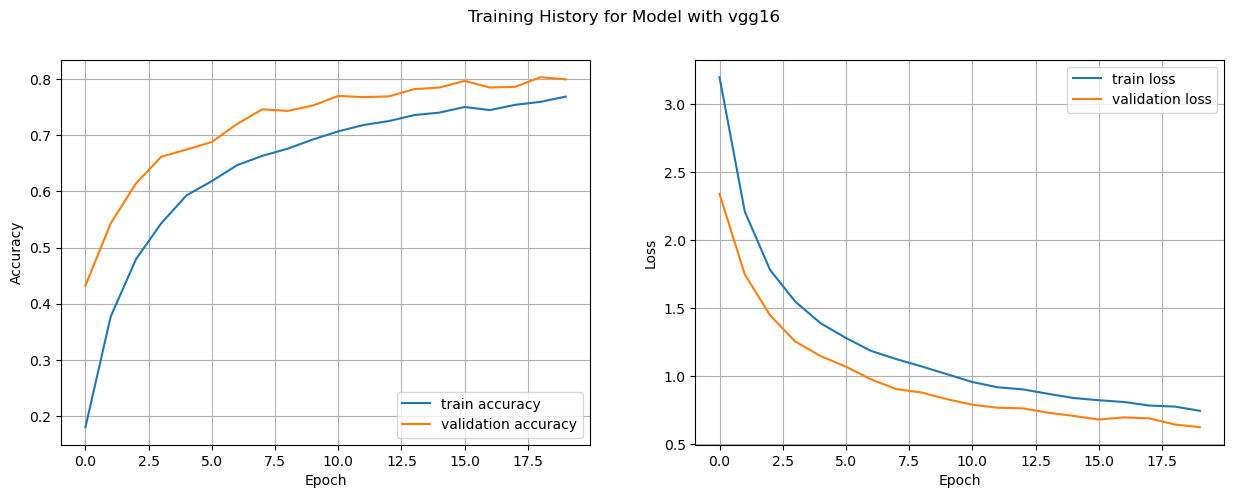

2023-12-12 17:42:07.170147: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-12-12 17:42:07.170170: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-12-12 17:42:07.170209: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2023-12-12 17:42:07.170223: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/20
  2/300 [..............................] - ETA: 26s - loss: 4.1479 - accuracy: 0.0156     

2023-12-12 17:42:07.891581: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-12-12 17:42:07.891605: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-12-12 17:42:07.891646: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2023-12-12 17:42:08.003045: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-12-12 17:42:08.003935: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-12-12 17:42:08.004406: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-12-12 17:42:08.005041: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/20231212-174207_vgg19/train/plugins/profile/2

300/300 [==============================] - 34s 113ms/step - loss: 3.6885 - accuracy: 0.0800 - val_loss: 2.5449 - val_accuracy: 0.3642
Epoch 2/20
300/300 [==============================] - 34s 113ms/step - loss: 2.5261 - accuracy: 0.2980 - val_loss: 1.9032 - val_accuracy: 0.5058
Epoch 3/20
300/300 [==============================] - 34s 115ms/step - loss: 2.0150 - accuracy: 0.4160 - val_loss: 1.5946 - val_accuracy: 0.5671
Epoch 4/20
300/300 [==============================] - 35s 115ms/step - loss: 1.7262 - accuracy: 0.4935 - val_loss: 1.3772 - val_accuracy: 0.6246
Epoch 5/20
300/300 [==============================] - 34s 115ms/step - loss: 1.5365 - accuracy: 0.5490 - val_loss: 1.2740 - val_accuracy: 0.6429
Epoch 6/20
300/300 [==============================] - 35s 115ms/step - loss: 1.4156 - accuracy: 0.5811 - val_loss: 1.1791 - val_accuracy: 0.6733
Epoch 7/20
300/300 [==============================] - 35s 115ms/step - loss: 1.3361 - accuracy: 0.6001 - val_loss: 1.1160 - val_accuracy: 0.6

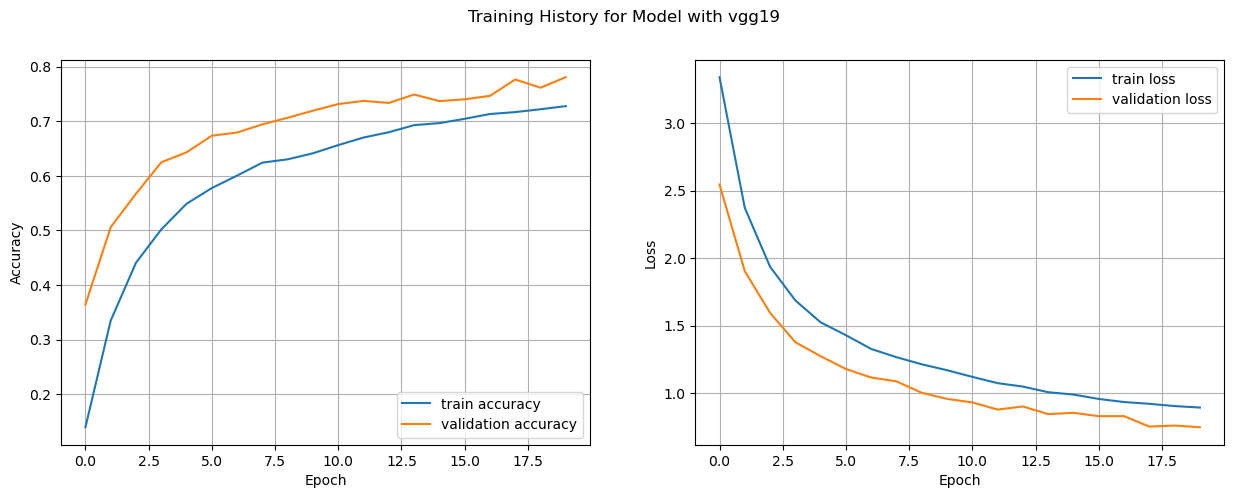

2023-12-12 17:54:09.546506: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-12-12 17:54:09.546538: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-12-12 17:54:09.546595: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2023-12-12 17:54:09.546618: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/20
  2/300 [..............................] - ETA: 21s - loss: 4.7750 - accuracy: 0.0547    

2023-12-12 17:54:23.468342: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-12-12 17:54:23.468368: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-12-12 17:54:23.468436: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2023-12-12 17:54:23.584830: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-12-12 17:54:23.589203: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-12-12 17:54:23.590380: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-12-12 17:54:23.591812: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/20231212-175409_mobilenetv2_1.00_128/train/pl

300/300 [==============================] - 47s 111ms/step - loss: 3.0777 - accuracy: 0.2326 - val_loss: 1.2939 - val_accuracy: 0.6313
Epoch 2/20
300/300 [==============================] - 32s 106ms/step - loss: 1.5338 - accuracy: 0.5427 - val_loss: 0.9593 - val_accuracy: 0.7146
Epoch 3/20
300/300 [==============================] - 31s 104ms/step - loss: 1.2088 - accuracy: 0.6289 - val_loss: 0.8211 - val_accuracy: 0.7554
Epoch 4/20
300/300 [==============================] - 31s 103ms/step - loss: 1.0442 - accuracy: 0.6779 - val_loss: 0.7979 - val_accuracy: 0.7513
Epoch 5/20
300/300 [==============================] - 31s 104ms/step - loss: 0.9512 - accuracy: 0.7050 - val_loss: 0.7241 - val_accuracy: 0.7804
Epoch 6/20
300/300 [==============================] - 31s 103ms/step - loss: 0.8809 - accuracy: 0.7254 - val_loss: 0.7050 - val_accuracy: 0.7837
Epoch 7/20
300/300 [==============================] - 31s 103ms/step - loss: 0.8203 - accuracy: 0.7436 - val_loss: 0.6439 - val_accuracy: 0.8

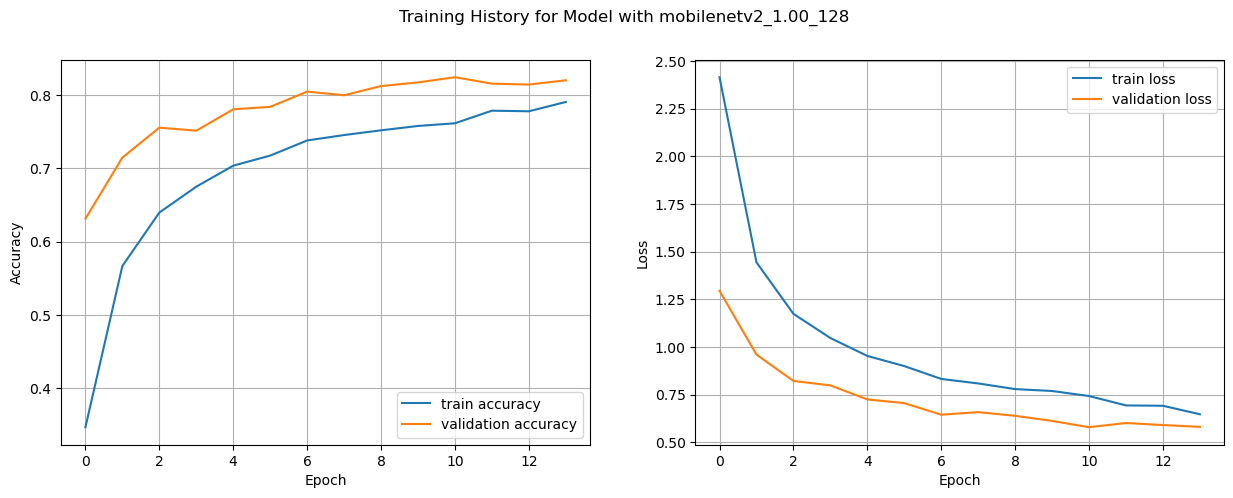

2023-12-12 18:01:43.740946: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-12-12 18:01:43.740971: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-12-12 18:01:43.741018: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2023-12-12 18:01:43.741033: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/20


2023-12-12 18:01:55.707574: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 3.22G (3461855232 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-12-12 18:01:56.191558: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 3.22G (3461855232 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory


  1/300 [..............................] - ETA: 1:04:31 - loss: 4.1635 - accuracy: 0.0312

2023-12-12 18:01:56.677914: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 3.22G (3461855232 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory


  2/300 [..............................] - ETA: 32s - loss: 4.1047 - accuracy: 0.0391    

2023-12-12 18:01:56.892660: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-12-12 18:01:56.892688: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-12-12 18:01:56.892763: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


  4/300 [..............................] - ETA: 48s - loss: 4.1040 - accuracy: 0.0397

2023-12-12 18:01:57.101660: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-12-12 18:01:57.106834: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-12-12 18:01:57.109428: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-12-12 18:01:57.112135: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/20231212-180143_resnet50/train/plugins/profile/2023_12_12_18_01_57
2023-12-12 18:01:57.112743: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/20231212-180143_resnet50/train/plugins/profile/2023_12_12_18_01_57/debajyoti-G7-7790.trace.json.gz
2023-12-12 18:01:57.138099: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/20231212-180143_resnet50/train/plugins/profile/2023_12_12_18_01_57
2023-12-12 18

300/300 [==============================] - 45s 108ms/step - loss: 3.9094 - accuracy: 0.0429 - val_loss: 3.6631 - val_accuracy: 0.0925
Epoch 2/20
300/300 [==============================] - 32s 108ms/step - loss: 3.6233 - accuracy: 0.0846 - val_loss: 3.4120 - val_accuracy: 0.1400
Epoch 3/20
300/300 [==============================] - 33s 108ms/step - loss: 3.3830 - accuracy: 0.1209 - val_loss: 3.1609 - val_accuracy: 0.2067
Epoch 4/20
300/300 [==============================] - 33s 110ms/step - loss: 3.2010 - accuracy: 0.1486 - val_loss: 3.0033 - val_accuracy: 0.2188
Epoch 5/20
300/300 [==============================] - 33s 110ms/step - loss: 3.0443 - accuracy: 0.1834 - val_loss: 2.8333 - val_accuracy: 0.2421
Epoch 6/20
300/300 [==============================] - 33s 111ms/step - loss: 2.8859 - accuracy: 0.2110 - val_loss: 2.6808 - val_accuracy: 0.2612
Epoch 7/20
300/300 [==============================] - 34s 113ms/step - loss: 2.7700 - accuracy: 0.2385 - val_loss: 2.5680 - val_accuracy: 0.3

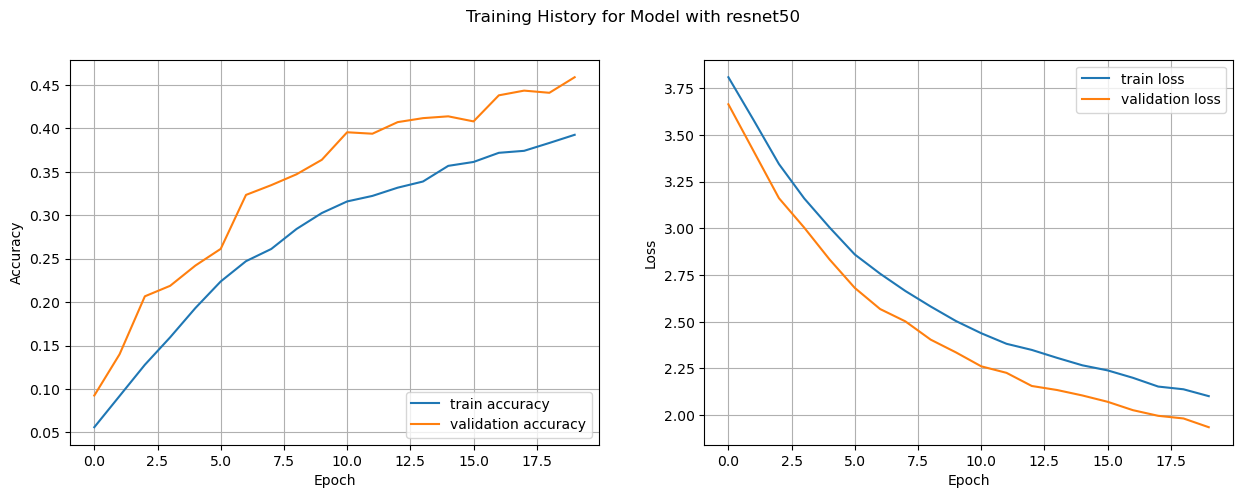

2023-12-12 18:13:39.513318: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-12-12 18:13:39.513343: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-12-12 18:13:39.513396: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2023-12-12 18:13:39.513415: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/20


2023-12-12 18:14:02.576341: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 3.22G (3461855232 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-12-12 18:14:03.067276: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 3.22G (3461855232 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-12-12 18:14:03.554876: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 3.22G (3461855232 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-12-12 18:14:06.737041: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 3.22G (3461855232 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-12-12 18:14:07.228036: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 3.22G (3461855232 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-12-12 18:14:07.720160: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 3.22

  1/300 [..............................] - ETA: 2:22:51 - loss: 6.3018 - accuracy: 0.0000e+00

2023-12-12 18:14:08.215695: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 3.22G (3461855232 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory


  2/300 [..............................] - ETA: 37s - loss: 6.3288 - accuracy: 0.0078        

2023-12-12 18:14:08.453182: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-12-12 18:14:08.453211: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-12-12 18:14:08.453282: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


  4/300 [..............................] - ETA: 54s - loss: 6.4793 - accuracy: 0.0150 

2023-12-12 18:14:08.707439: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-12-12 18:14:08.716187: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-12-12 18:14:08.719611: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-12-12 18:14:08.722670: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/20231212-181339_inception_v3/train/plugins/profile/2023_12_12_18_14_08
2023-12-12 18:14:08.723417: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/20231212-181339_inception_v3/train/plugins/profile/2023_12_12_18_14_08/debajyoti-G7-7790.trace.json.gz
2023-12-12 18:14:08.747996: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/20231212-181339_inception_v3/train/plugins/profile/2023_12_12_18_14_08
2

300/300 [==============================] - 62s 112ms/step - loss: 4.0116 - accuracy: 0.0937 - val_loss: 2.5329 - val_accuracy: 0.3150
Epoch 2/20
300/300 [==============================] - 32s 107ms/step - loss: 2.8106 - accuracy: 0.2177 - val_loss: 2.1661 - val_accuracy: 0.4029
Epoch 3/20
300/300 [==============================] - 32s 106ms/step - loss: 2.4761 - accuracy: 0.2925 - val_loss: 1.9969 - val_accuracy: 0.4375
Epoch 4/20
300/300 [==============================] - 32s 106ms/step - loss: 2.3507 - accuracy: 0.3159 - val_loss: 1.8531 - val_accuracy: 0.4700
Epoch 5/20
300/300 [==============================] - 32s 106ms/step - loss: 2.2904 - accuracy: 0.3329 - val_loss: 1.8114 - val_accuracy: 0.4704
Epoch 6/20
300/300 [==============================] - 32s 105ms/step - loss: 2.2443 - accuracy: 0.3568 - val_loss: 1.7499 - val_accuracy: 0.4783
Epoch 7/20
300/300 [==============================] - 32s 106ms/step - loss: 2.1903 - accuracy: 0.3595 - val_loss: 1.6919 - val_accuracy: 0.5

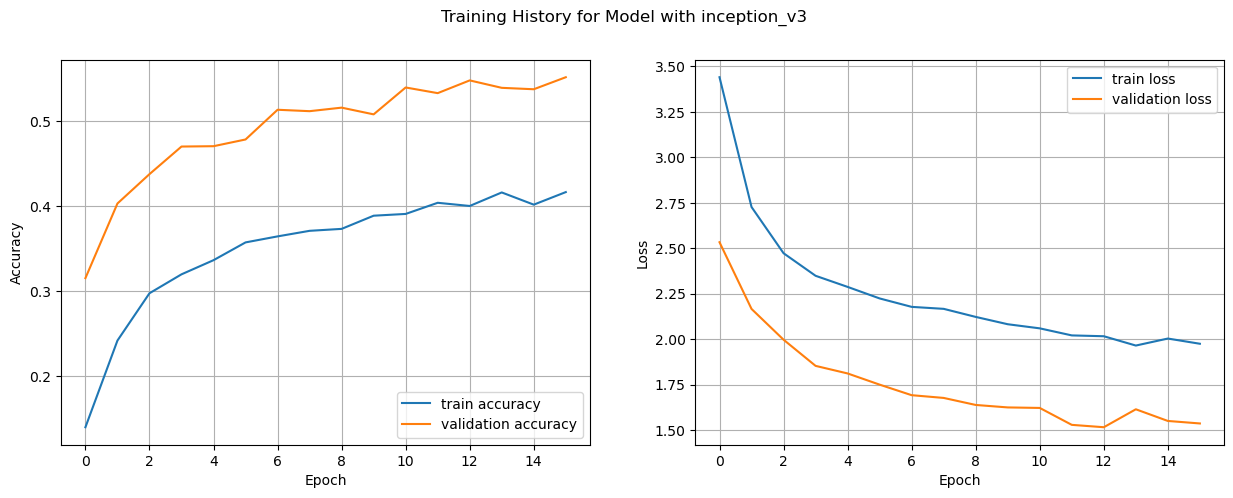

2023-12-12 18:23:01.375282: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-12-12 18:23:01.375305: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-12-12 18:23:01.375342: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2023-12-12 18:23:01.375356: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/20
  2/300 [..............................] - ETA: 1:28 - loss: 4.2662 - accuracy: 0.0234   

2023-12-12 18:24:13.900791: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-12-12 18:24:13.900817: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-12-12 18:24:13.900883: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


  4/300 [..............................] - ETA: 1:31 - loss: 4.2946 - accuracy: 0.0254

2023-12-12 18:24:14.368166: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-12-12 18:24:14.385425: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-12-12 18:24:14.391079: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-12-12 18:24:14.396280: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/20231212-182301_densenet201/train/plugins/profile/2023_12_12_18_24_14
2023-12-12 18:24:14.397944: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/20231212-182301_densenet201/train/plugins/profile/2023_12_12_18_24_14/debajyoti-G7-7790.trace.json.gz
2023-12-12 18:24:14.431783: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/20231212-182301_densenet201/train/plugins/profile/2023_12_12_18_24_14
2023

300/300 [==============================] - 107s 117ms/step - loss: 3.1883 - accuracy: 0.1959 - val_loss: 1.5100 - val_accuracy: 0.6037
Epoch 2/20
300/300 [==============================] - 33s 112ms/step - loss: 1.7102 - accuracy: 0.4947 - val_loss: 1.1022 - val_accuracy: 0.6829
Epoch 3/20
300/300 [==============================] - 34s 115ms/step - loss: 1.2825 - accuracy: 0.6095 - val_loss: 0.9721 - val_accuracy: 0.7138
Epoch 4/20
300/300 [==============================] - 35s 117ms/step - loss: 1.1253 - accuracy: 0.6523 - val_loss: 0.8419 - val_accuracy: 0.7442
Epoch 5/20
300/300 [==============================] - 35s 117ms/step - loss: 1.0515 - accuracy: 0.6688 - val_loss: 0.7698 - val_accuracy: 0.7650
Epoch 6/20
300/300 [==============================] - 36s 119ms/step - loss: 0.9323 - accuracy: 0.7095 - val_loss: 0.7778 - val_accuracy: 0.7671
Epoch 7/20
300/300 [==============================] - 36s 121ms/step - loss: 0.9334 - accuracy: 0.7039 - val_loss: 0.7198 - val_accuracy: 0.

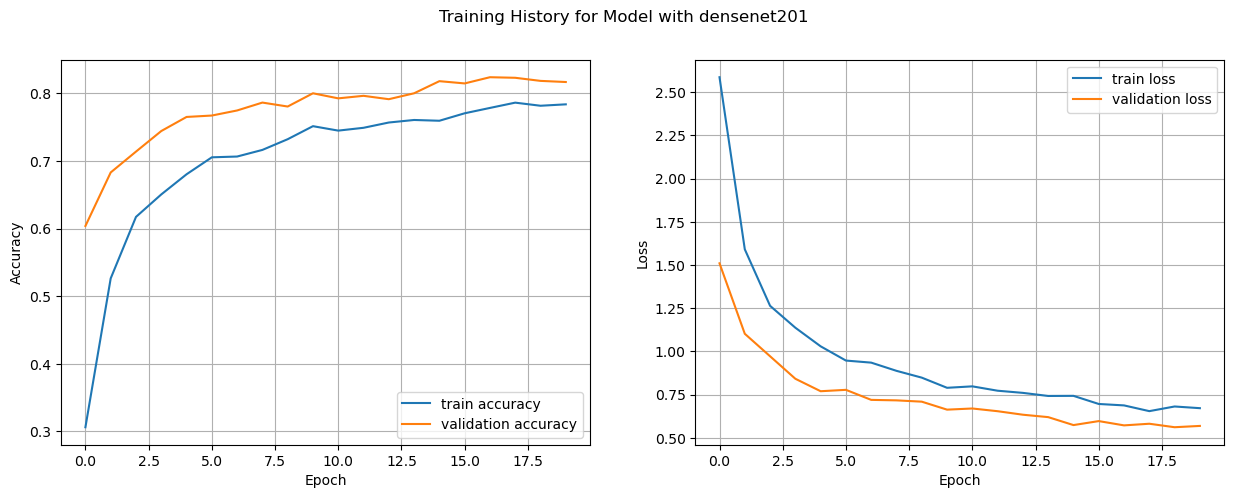

2023-12-12 18:36:43.507985: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-12-12 18:36:43.508017: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-12-12 18:36:43.508062: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2023-12-12 18:36:43.508078: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/20


2023-12-12 18:36:51.266611: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 3.22G (3461855232 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-12-12 18:36:51.817021: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 3.22G (3461855232 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-12-12 18:36:52.780879: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 3.22G (3461855232 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory


  2/300 [..............................] - ETA: 35s - loss: 4.0942 - accuracy: 0.0000e+00  

2023-12-12 18:36:54.111319: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-12-12 18:36:54.111351: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-12-12 18:36:54.111434: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


  4/300 [..............................] - ETA: 1:07 - loss: 4.1198 - accuracy: 0.0000e+00

2023-12-12 18:36:54.535933: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-12-12 18:36:54.541869: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-12-12 18:36:54.543415: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-12-12 18:36:54.544987: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/20231212-183643_xception/train/plugins/profile/2023_12_12_18_36_54
2023-12-12 18:36:54.545640: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/20231212-183643_xception/train/plugins/profile/2023_12_12_18_36_54/debajyoti-G7-7790.trace.json.gz
2023-12-12 18:36:54.570002: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/20231212-183643_xception/train/plugins/profile/2023_12_12_18_36_54
2023-12-12 18

300/300 [==============================] - 46s 120ms/step - loss: 3.2016 - accuracy: 0.1959 - val_loss: 1.8787 - val_accuracy: 0.4946
Epoch 2/20
300/300 [==============================] - 35s 116ms/step - loss: 1.9836 - accuracy: 0.4448 - val_loss: 1.4869 - val_accuracy: 0.5783
Epoch 3/20
300/300 [==============================] - 35s 117ms/step - loss: 1.6094 - accuracy: 0.5333 - val_loss: 1.3596 - val_accuracy: 0.6125
Epoch 4/20
300/300 [==============================] - 35s 117ms/step - loss: 1.4987 - accuracy: 0.5632 - val_loss: 1.2692 - val_accuracy: 0.6313
Epoch 5/20
300/300 [==============================] - 35s 117ms/step - loss: 1.3572 - accuracy: 0.5906 - val_loss: 1.1845 - val_accuracy: 0.6392
Epoch 6/20
300/300 [==============================] - 35s 117ms/step - loss: 1.2985 - accuracy: 0.6115 - val_loss: 1.1350 - val_accuracy: 0.6646
Epoch 7/20
300/300 [==============================] - 35s 118ms/step - loss: 1.2649 - accuracy: 0.6108 - val_loss: 1.1245 - val_accuracy: 0.6

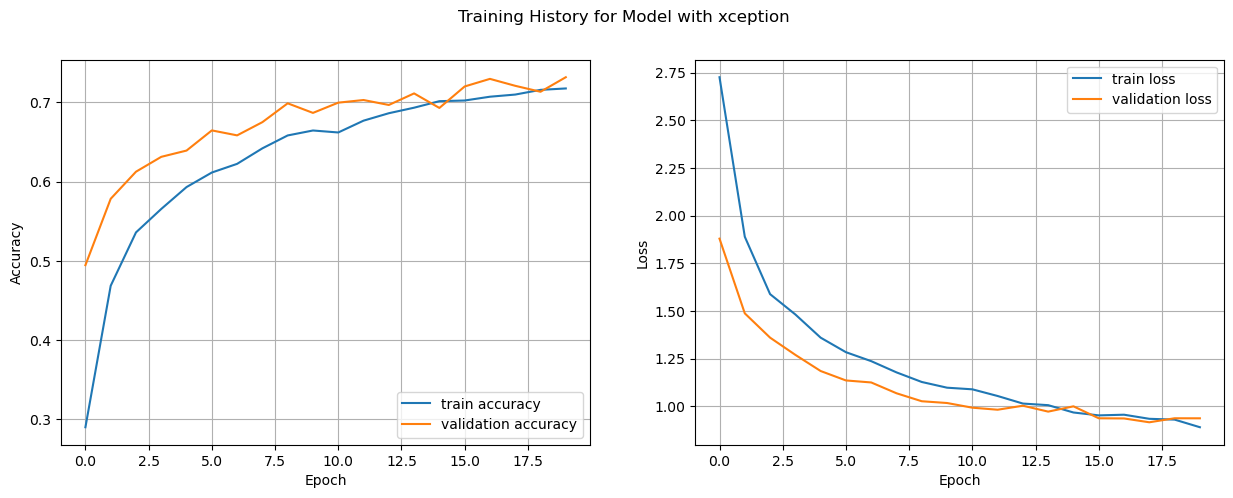

In [6]:
# Train models with different base models
for base_model in base_models:
    model = create_transfer_model(base_model)
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    # Define TensorBoard callback
    log_dir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S") + "_" + base_model.name
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

    # Train the model with validation data and early stopping
    h = model.fit(
        train_generator,
        epochs=20,  # Adjust as needed
        steps_per_epoch=train_generator.samples // batch_size,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=[early_stopping, tensorboard_callback]
    )

    # Evaluate the model on your test set if available

    # Save the model or store the results for later comparison
    model.save('./models/model_with_' + base_model.name + '_with_validation_early_stopping.h5')

    # Plot and save the training history as a PDF
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(h.history['accuracy'], label='train accuracy')
    plt.plot(h.history['val_accuracy'], label='validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(h.history['loss'], label='train loss')
    plt.plot(h.history['val_loss'], label='validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    # plt.ylim([0, 1])
    plt.legend(loc='upper right')

    plt.suptitle('Training History for Model with ' + base_model.name)
    plt.savefig('./results/training_history_' + base_model.name + '.pdf')
    plt.show()

In [1]:
tensorboard --logdir logs


SyntaxError: invalid syntax (323146663.py, line 1)